## Project - Healthcare

Predict whether a patient has diabetes.

### Project Steps Followed

1. Define Project Goals/Objective
2. Data Retrieval
3. Data Cleansing
4. Exploratory Data Analysis
5. Data Modeling
6. Result Analysis

### Project Goals/Objective

To predict whether a patient has diabetes based on certain medical predictor variables.

### Data Retrieval

The dataset includes several predictors (pregnancies such as BMI, insulin level, age, and so on) and one target variable

The feilds are 

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigree
8. Age
9. Outcome

#### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Data

In [2]:
diab = pd.read_csv('diabetes-data.csv')

#### Analysis of Data

In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Type Analysis

Check the data types, columns, null value counts, memory usage etc

In [4]:
diab.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Cleansing

In [5]:
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

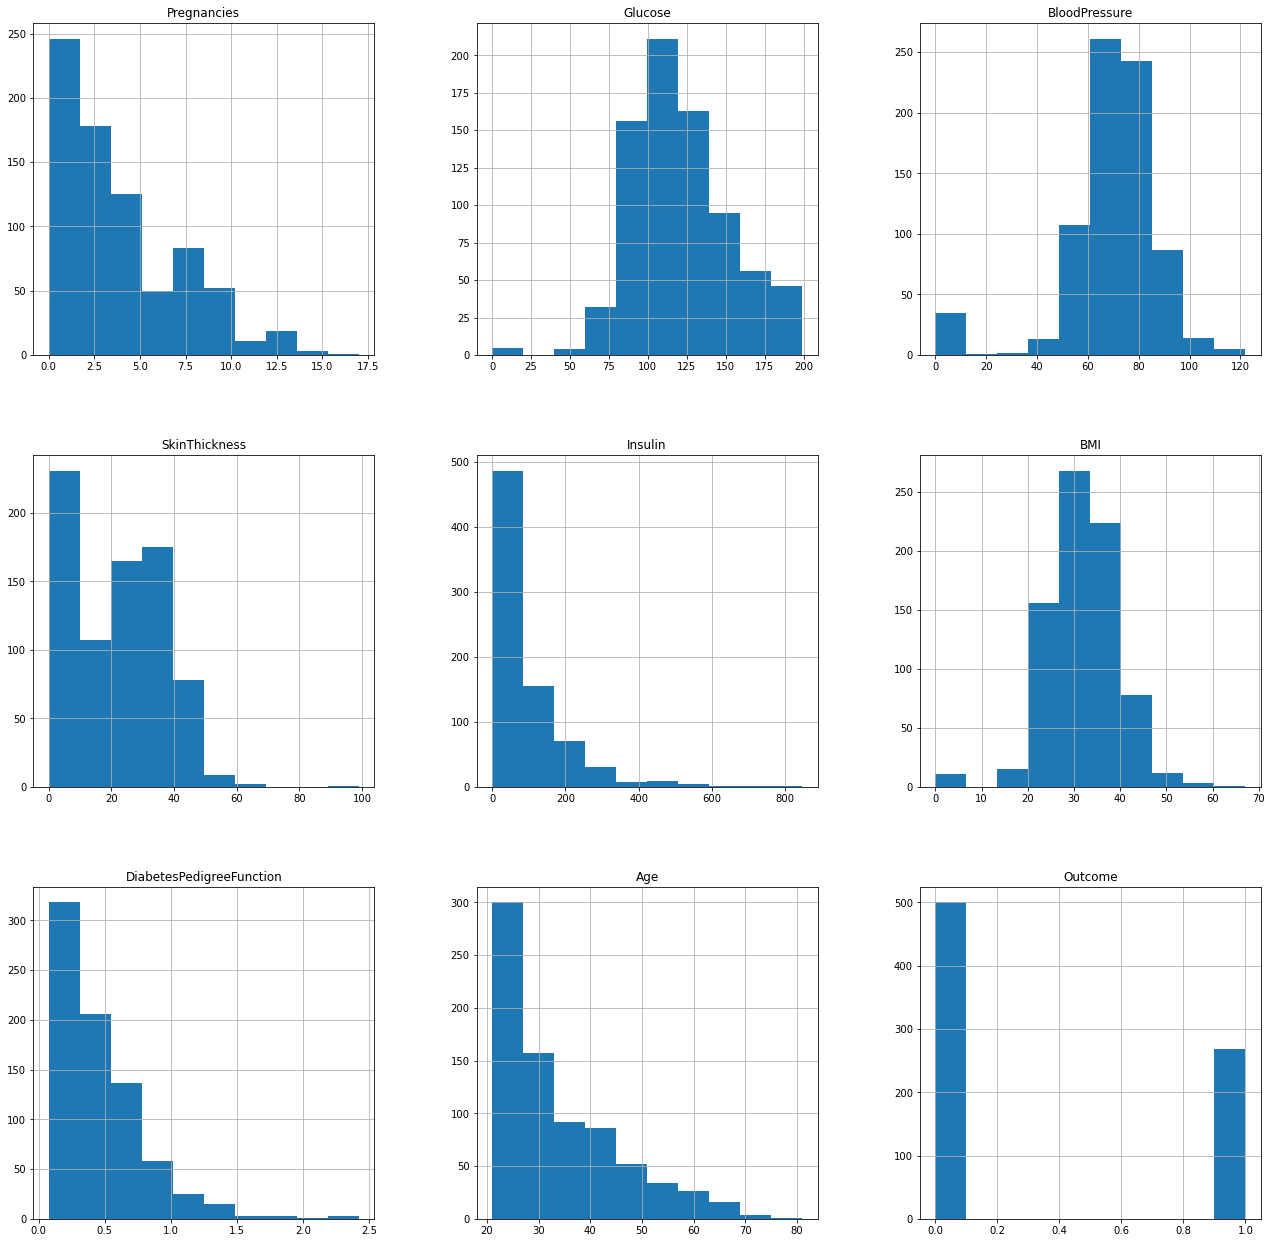

In [7]:
Histplot=diab.hist(figsize=(22,22))

In [8]:
diab_copy=diab.copy(deep=True)
diab_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diab_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
diab_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

The following fields have an invalid zero value

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

In [10]:
diab.isnull().sum()         ## As it has not affected the orginal data with the help of deep copy

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diab_copy['Glucose'].fillna(diab_copy['Glucose'].mean(),inplace=True)
diab_copy['BloodPressure'].fillna(diab_copy['BloodPressure'].median(),inplace = True)
diab_copy['SkinThickness'].fillna(diab_copy['SkinThickness'].mean(),inplace = True)
diab_copy['Insulin'].fillna(diab_copy['Insulin'].median(), inplace = True)
diab_copy['BMI'].fillna(diab_copy['BMI'].median(), inplace = True)

##Filling na values with mean / median

We copy the dataframe to a new dataframe and then replace the zero values in the above given 5 variables with NaN in above code.

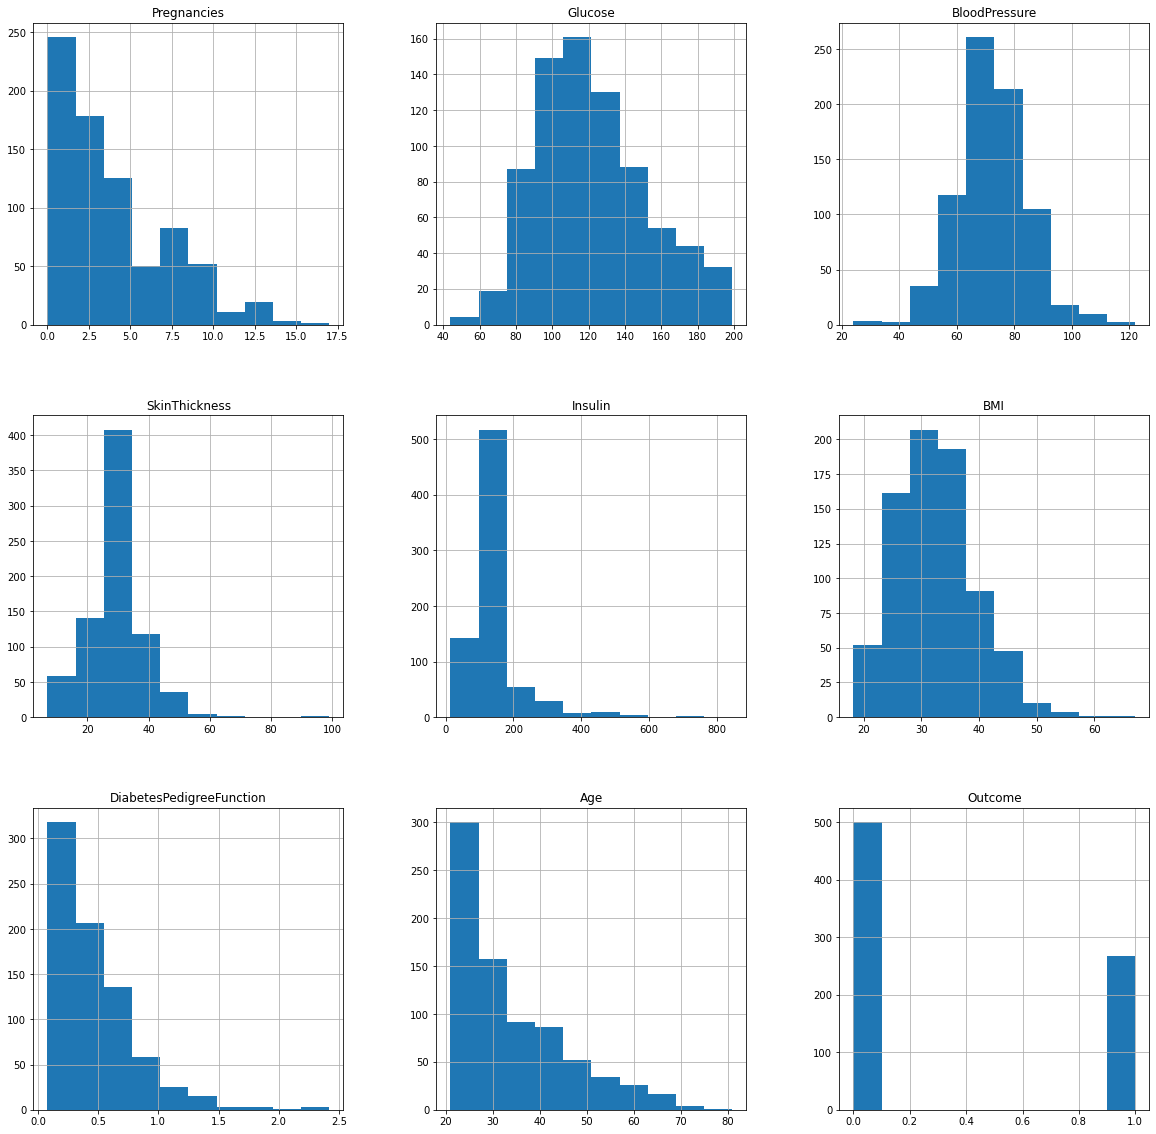

In [13]:
histplot_copy=diab_copy.hist( figsize = (20,20))

### Skewness of graph 

Pregnancies graph is right skewed

Glucose graph is Multi Modal

blood Prssure graph is Multi Modal

SkinThickness graph is Unimodal

Insulin graph is Unimodal / Right Skewed

BMI graph is Multi Modal

DiabetesPedigree graph is right skewed

Age graph is right skewed

Outcome graph is Bimodal

### Exploratory Data Analysis

In [13]:
diab.shape

(768, 9)

<AxesSubplot:>

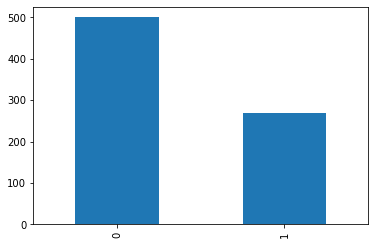

In [14]:
diab['Outcome'].value_counts().plot(kind='bar')

### Pairplot of Unclean Data

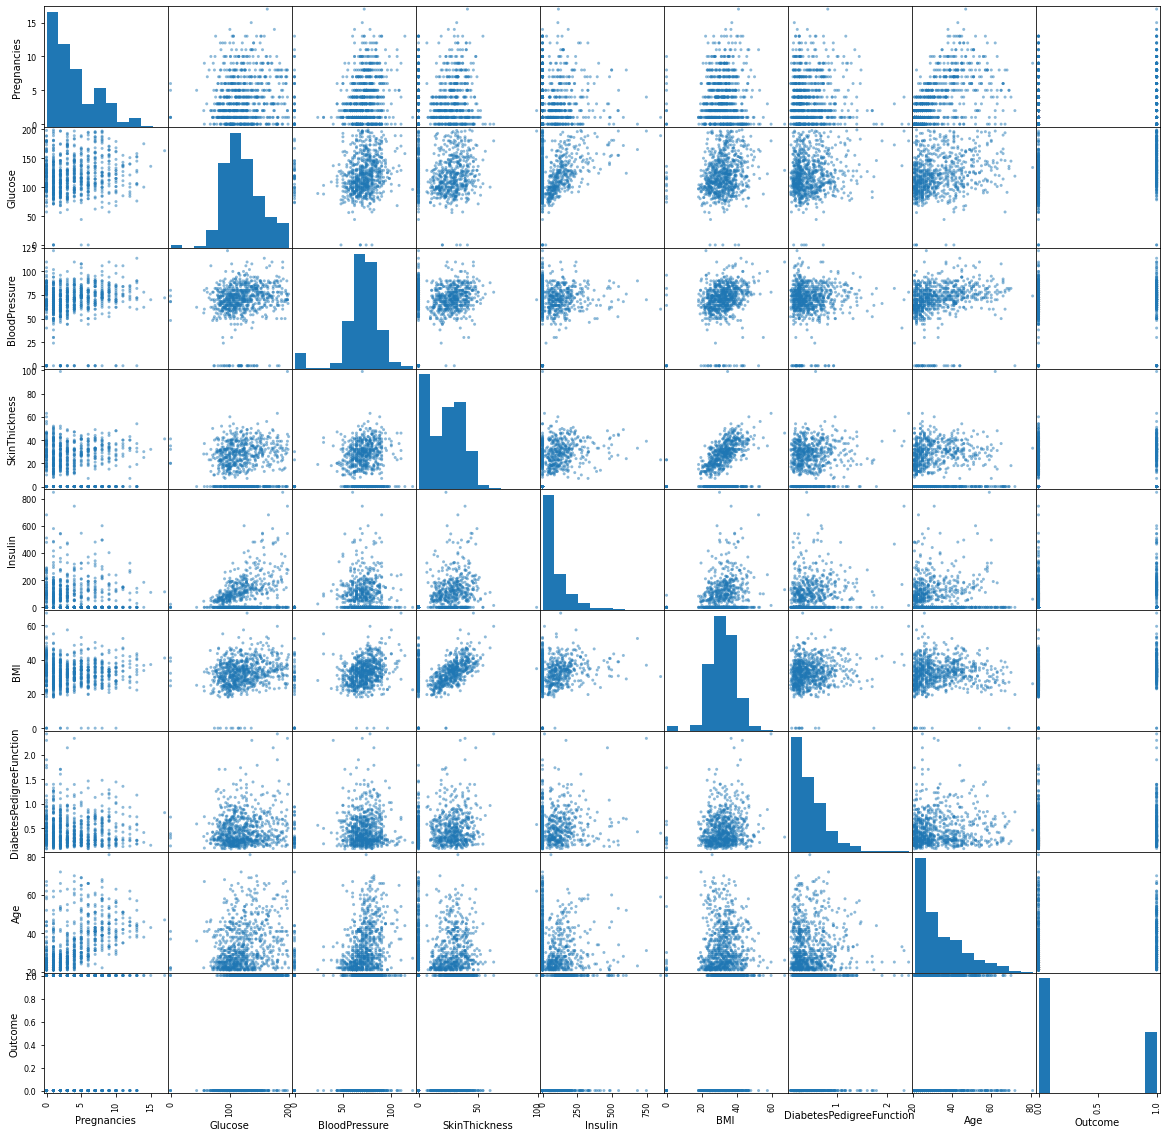

In [15]:
b= pd.plotting.scatter_matrix(diab, figsize=(20,20)) 

### Pairplot of Clean Data

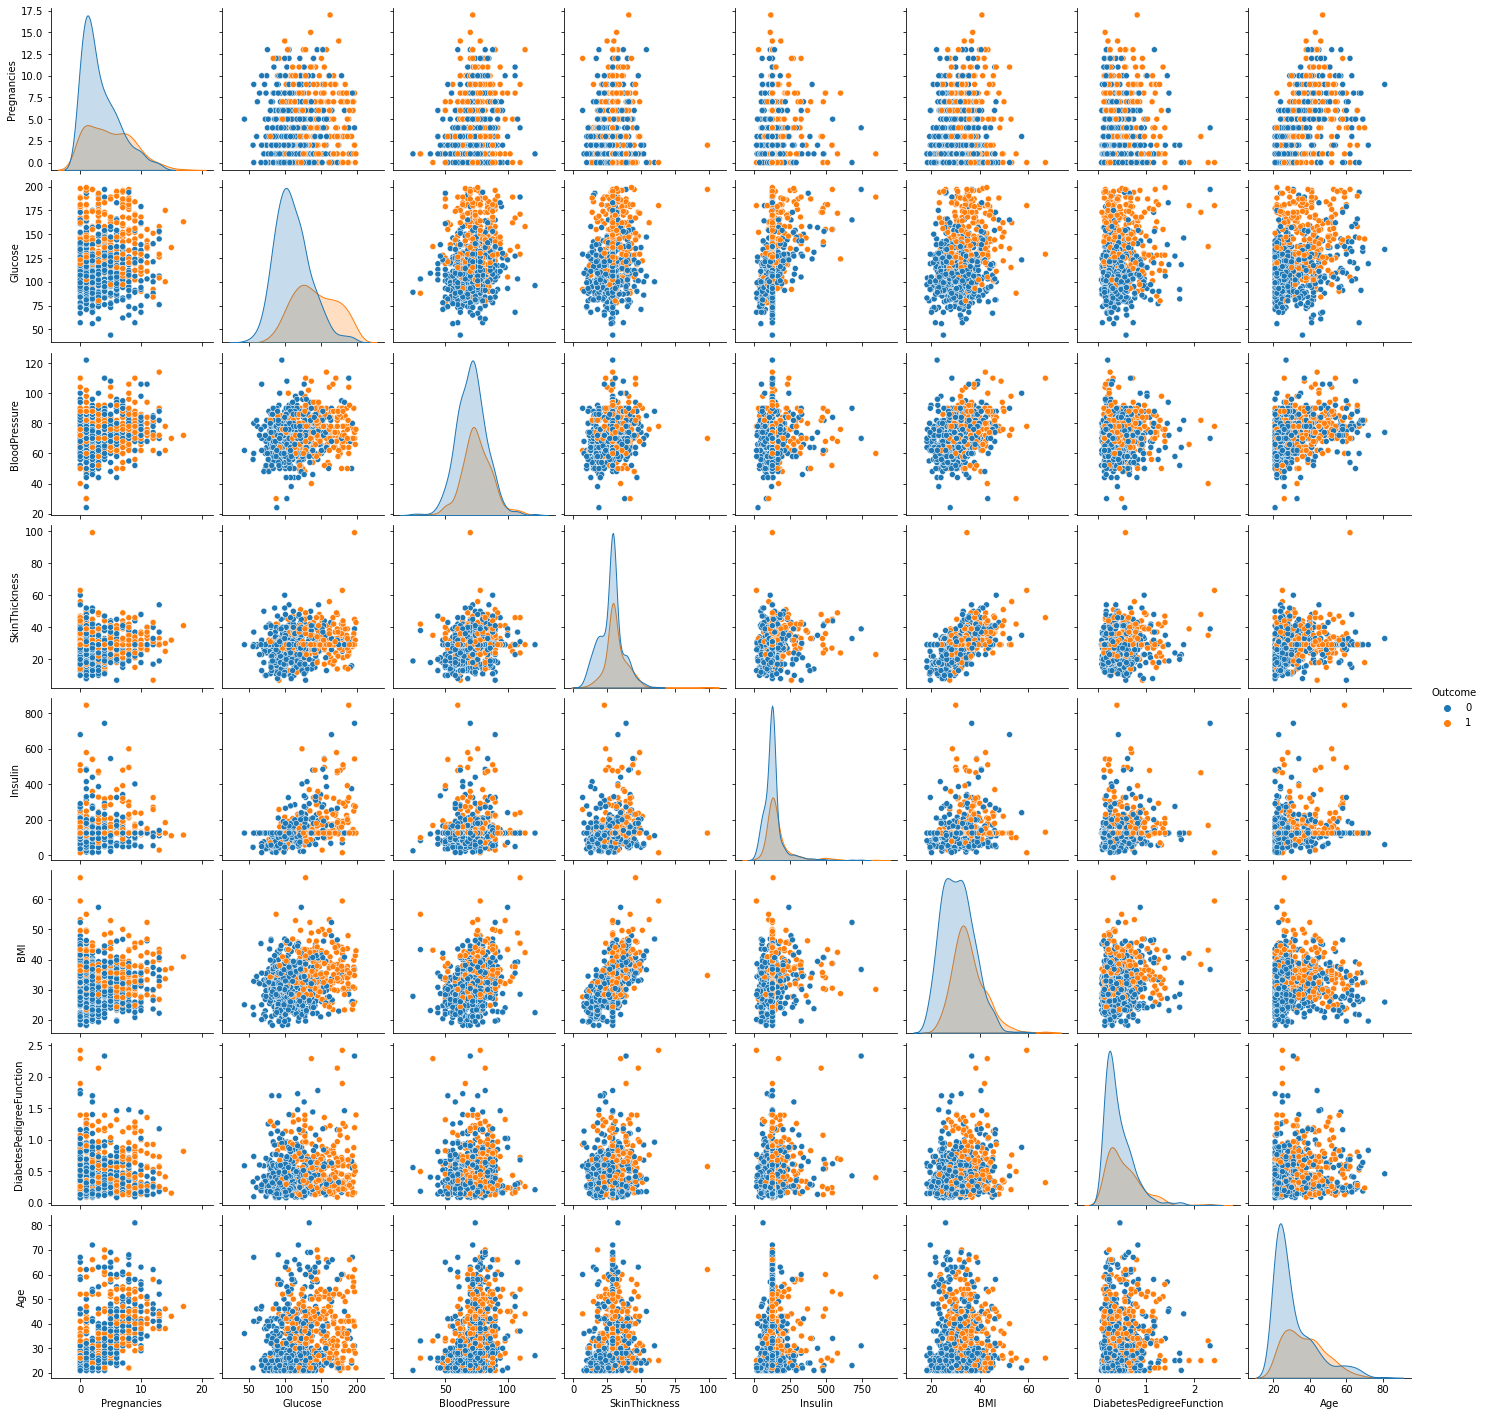

In [16]:
a= sns.pairplot(diab_copy, hue = 'Outcome')   

### HeatMap of Unclean Data

<AxesSubplot:>

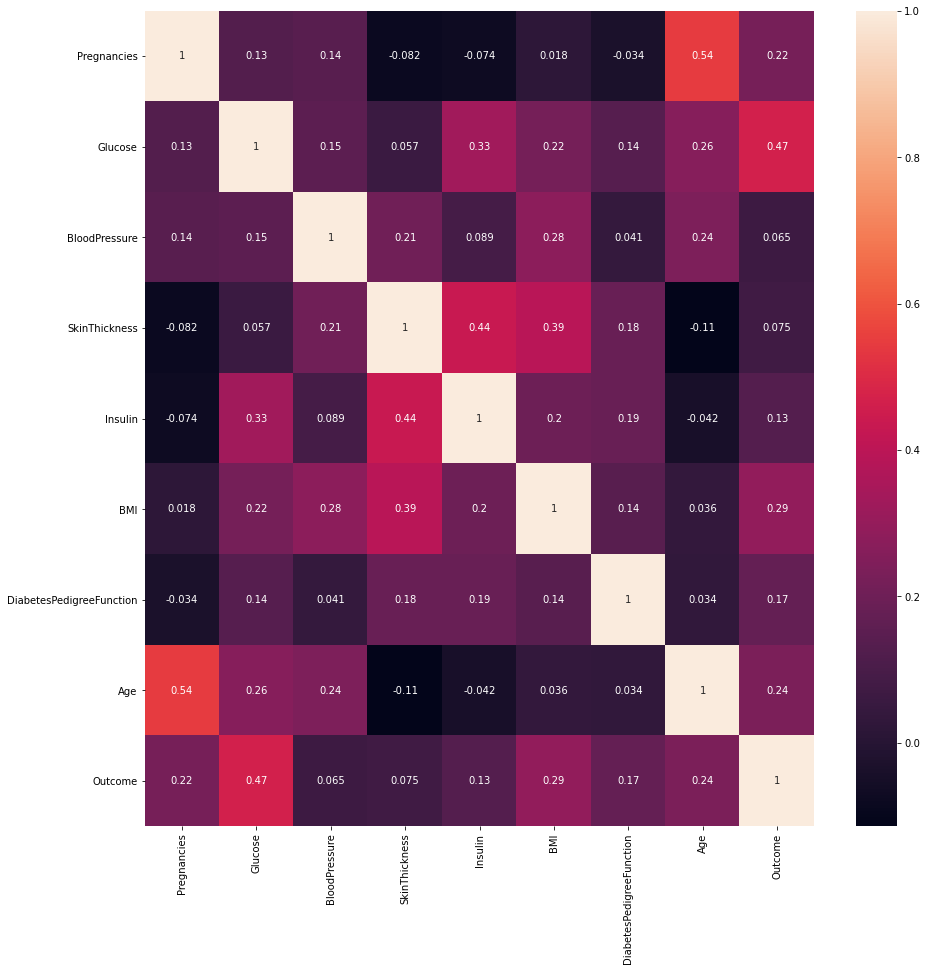

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(diab.corr(),annot=True)

## HeatMap of Clean Data

<AxesSubplot:>

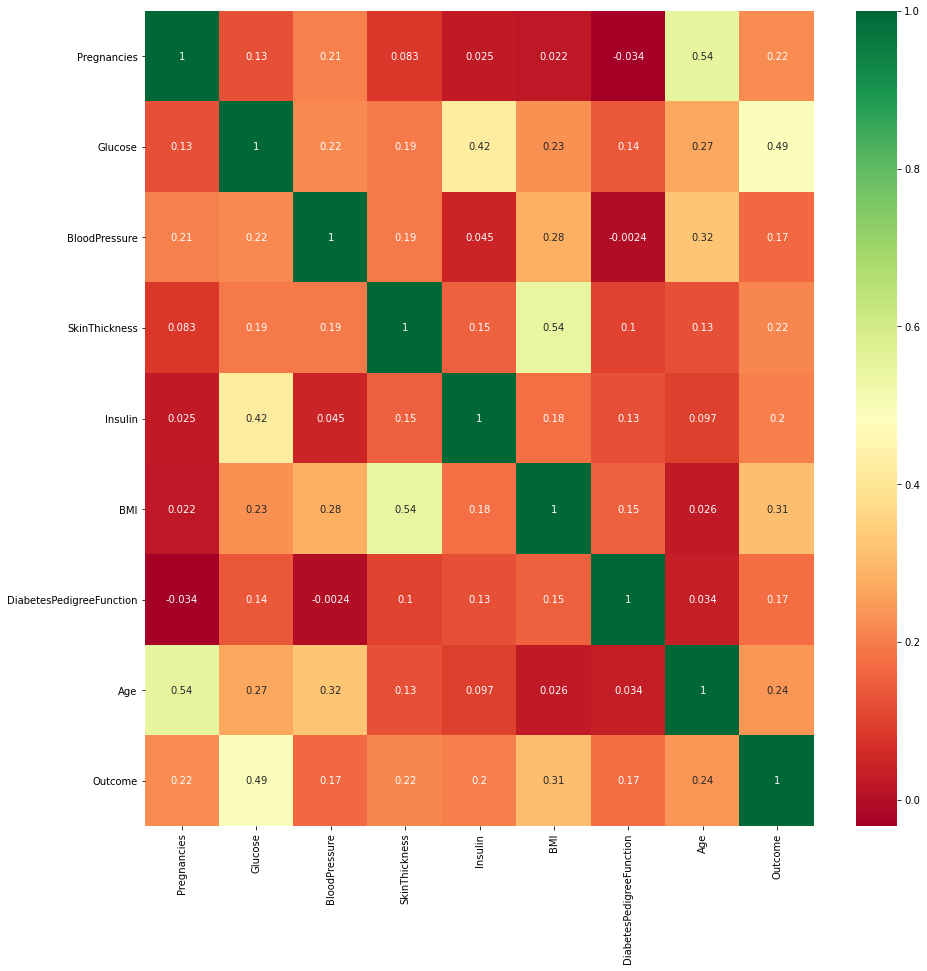

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(diab_copy.corr(),annot=True,color="Red",cmap ='RdYlGn')

In Clean Data,

Relation between Glucose and Age have little Change

Relation between Blood Pressure and Age also have a Little change

Relation between Skin Thickness and Age have a large change as value -0.11 has changed to +0.13

Highest Correlation of Outcome to Blood Pressure is 0.49

Lowest Correlation of Outcome to Diabetes Pedigree Function  is 0.17

## MODALS

### Scaling the Data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale_x= StandardScaler()

In [21]:
X=scale_x.fit_transform(diab_copy.drop(['Outcome'],axis=1))   # Scaling the data

In [22]:
X=pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.031990,6.655021e-01,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.528319,-1.746338e-02,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.693761,8.087936e-16,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.528319,-7.004289e-01,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.679076,6.655021e-01,0.316566,1.549303,5.484909,-0.020496


### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y=diab_copy.Outcome

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=43,stratify=y)

### KNN Model (k Nearest Neighbours)

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
testing_score = []
training_score = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    training_score.append(knn.score(x_train,y_train))
    testing_score.append(knn.score(x_test,y_test))

In [28]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


From the above results, we can see that the training accuracy was 100% for k = 1. As we have seen from the text, KNN is highly flexible when k = 1

In [29]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))


Max testing score 77.34375 % and k = [14]


The testing accuracy 77.34375 % is highest with k = 14

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


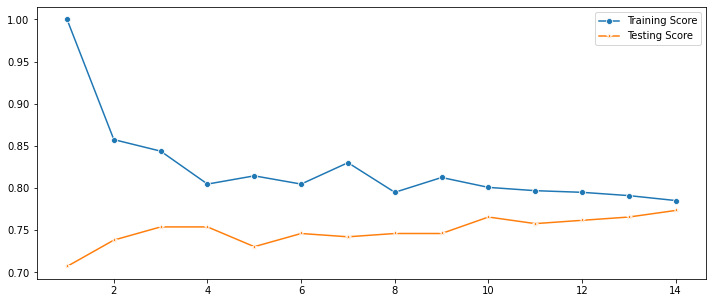

In [30]:
plt.figure(figsize=(12,5))
pplot = sns.lineplot(range(1,15),training_score,marker='o',label='Training Score')
pplot = sns.lineplot(range(1,15),testing_score,marker='*',label='Testing Score')

#### We can see that the highest testing accuracy is with k = 14. We can build our KNN model with k = 14

In [31]:
knn = KNeighborsClassifier(14)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.7734375